# Titanic Kaggle Project

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df2 = df.copy()

## Dropping Useless Columns

In [5]:
df.drop(['PassengerId' , 'Name'] , axis = 1 , inplace = True)

# Separating Target Column

In [6]:
y = df['Survived']

In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
df.drop('Survived' , axis = 1 , inplace = True)

## Exploratory Data Analysis

In [9]:
df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,female,19.0,0,0,112053,30.0000,B42,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [11]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking Out Missing Data

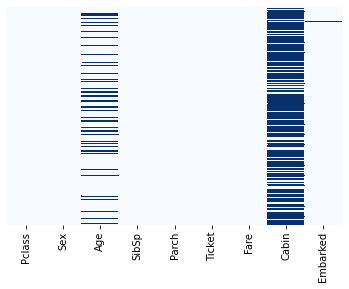

In [12]:
sns.heatmap(df.isnull(),yticklabels= False,cbar = False,cmap = "Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C00096430>,
      dtype=object)

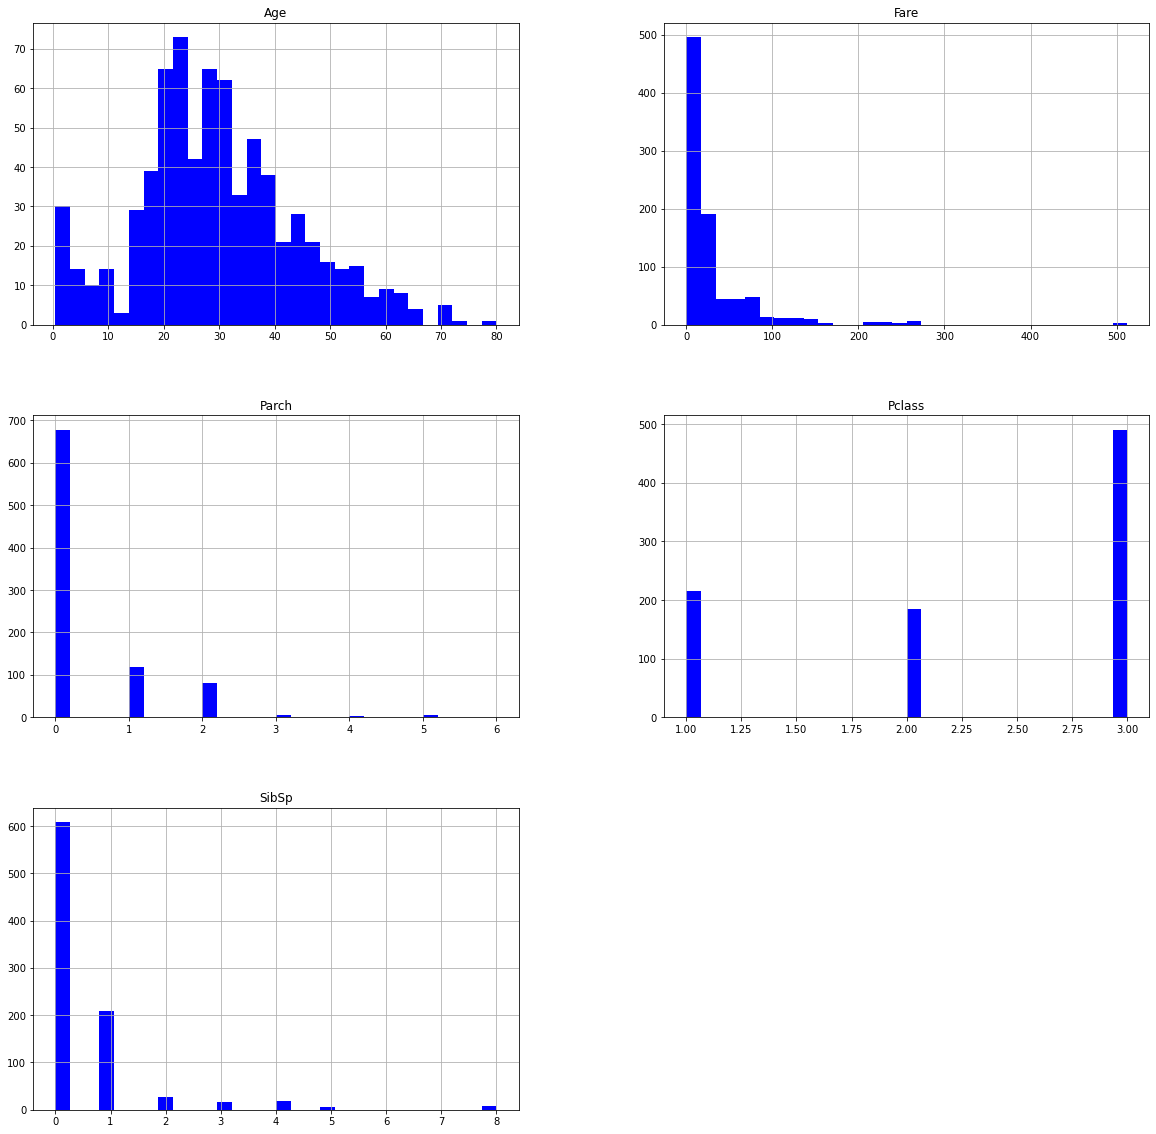

In [13]:
df.hist(bins = 30, figsize = (20,20) , color = "b")

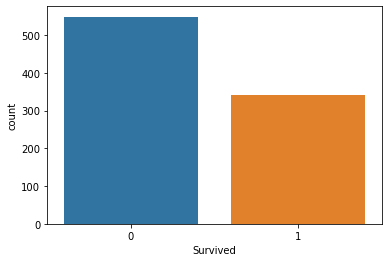

In [14]:
sns.countplot(y)

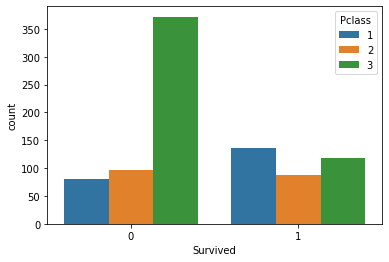

In [15]:
sns.countplot(x = 'Survived' , hue = 'Pclass' , data = df2)

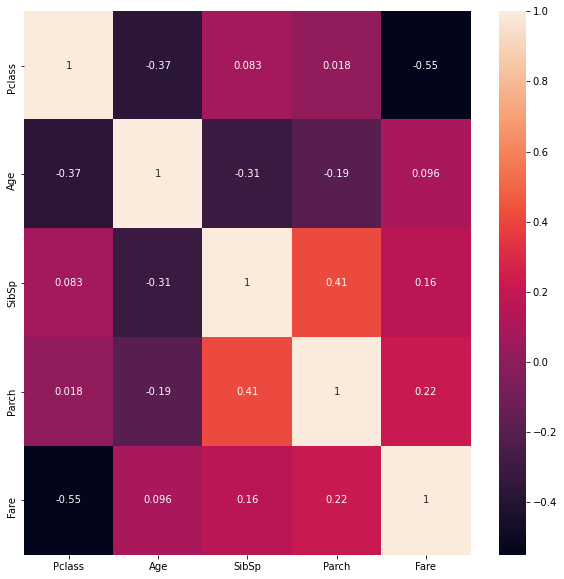

In [16]:
correlations = df.corr()
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations,annot=True)

## Modelo1: Usando solo las filas no nulas

In [17]:
df1 = df.copy()
df1.drop(['Age' , 'Cabin' ,'Fare' , 'Ticket'] , axis = 1 , inplace = True)

In [18]:
df1.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


In [19]:
df1 = pd.concat([df1, y], axis=1)

In [20]:
df1.dropna(inplace = True)

In [21]:
y = df1['Survived']
df1.drop('Survived' , axis = 1 , inplace = True)

In [22]:
categoricalsex = pd.get_dummies(df1['Sex'], drop_first = True)
categoricalembarked = pd.get_dummies(df1['Embarked'], drop_first = True)
categoricalpclass = pd.get_dummies(df1['Pclass'], drop_first = True)
df1.drop(['Pclass' , 'Sex' ,'Embarked'] , axis = 1 , inplace = True)

In [26]:
X = pd.concat([df1, categoricalsex,categoricalembarked,categoricalpclass], axis=1)

# Train, Val , Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [28]:
X_train

,SibSp,Parch,male,Q,S,2,3
663,0,0,1,0,1,0,1
722,0,0,1,0,1,1,0
134,0,0,1,0,1,1,0
463,0,0,1,0,1,1,0
52,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
117,1,0,1,0,1,1,0
743,1,0,1,0,1,0,1
45,0,0,1,0,1,0,1
375,1,0,0,0,0,0,0


In [29]:
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size = 0.5)

In [30]:
X_test

,SibSp,Parch,male,Q,S,2,3
31,1,0,0,0,0,0,0
244,0,0,1,0,0,0,1
177,0,0,0,0,0,0,0
104,2,0,1,0,1,0,1
458,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
813,4,2,0,0,1,0,1
279,1,1,0,0,1,0,1
162,0,0,1,0,1,0,1
205,0,1,0,0,1,0,1


In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train,y_train, epochs=100 , validation_data=(X_val, y_val))

Epoch 1/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6088 - accuracy: 0.6287 - val_loss: 0.5261 - val_accuracy: 0.7753
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.7482 - val_loss: 0.4786 - val_accuracy: 0.8090
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7848 - val_loss: 0.4431 - val_accuracy: 0.8315
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7876 - val_loss: 0.4130 - val_accuracy: 0.8315
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.7904 - val_loss: 0.4034 - val_accuracy: 0.8427
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7989 - val_loss: 0.3790 - val_accuracy: 0.8427
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7932 - val_loss: 0.3903 - val_accuracy: 0.8427
Epoch 8/100
2

Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.7975 - val_loss: 0.4442 - val_accuracy: 0.8090
Epoch 60/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8214 - val_loss: 0.4352 - val_accuracy: 0.7978
Epoch 61/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8158 - val_loss: 0.4535 - val_accuracy: 0.7978
Epoch 62/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.7918 - val_loss: 0.4493 - val_accuracy: 0.8090
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8200 - val_loss: 0.4414 - val_accuracy: 0.7978
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8101 - val_loss: 0.4563 - val_accuracy: 0.7978
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8186 - val_loss: 0.4455 - val_accuracy: 0.7865
Epoch 

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

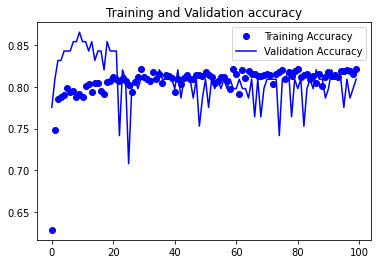

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

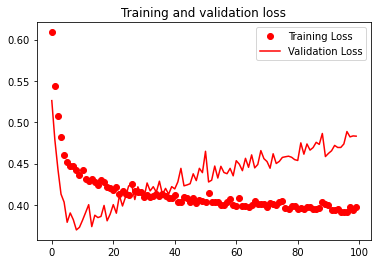

In [36]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
predicted_classes = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


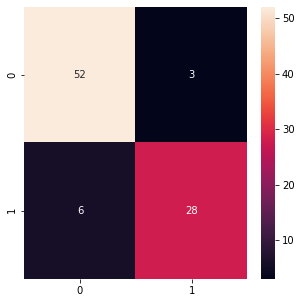

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)

## Regularization

In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1 , activation = 'sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train,y_train, epochs=100 , validation_data=(X_val, y_val))

Epoch 1/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.5513 - val_loss: 0.6293 - val_accuracy: 0.5955
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6245 - val_loss: 0.5909 - val_accuracy: 0.5955
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.6273 - val_loss: 0.5657 - val_accuracy: 0.6629
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.6709 - val_loss: 0.5473 - val_accuracy: 0.7865
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7046 - val_loss: 0.5216 - val_accuracy: 0.7978
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7356 - val_loss: 0.4999 - val_accuracy: 0.7865
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7454 - val_loss: 0.4817 - val_accuracy: 0.7753
Epoch 8/100
2

Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7848 - val_loss: 0.3950 - val_accuracy: 0.8539
Epoch 60/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7961 - val_loss: 0.3901 - val_accuracy: 0.8539
Epoch 61/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7961 - val_loss: 0.3870 - val_accuracy: 0.8539
Epoch 62/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.7947 - val_loss: 0.3811 - val_accuracy: 0.8652
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7961 - val_loss: 0.3810 - val_accuracy: 0.8764
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7975 - val_loss: 0.3909 - val_accuracy: 0.8539
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7736 - val_loss: 0.3935 - val_accuracy: 0.8764
Epoch 

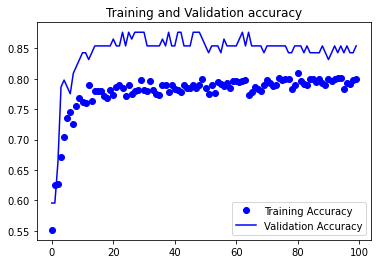

In [41]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

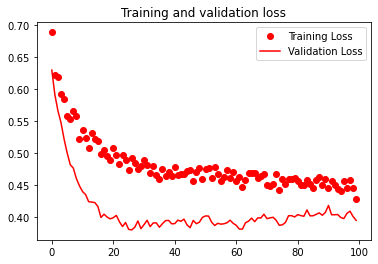

In [42]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

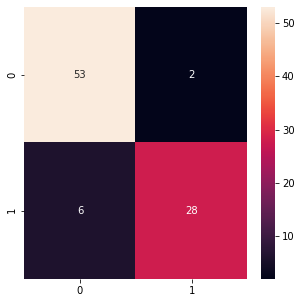

In [43]:
predicted_classes = model.predict_classes(X_test)
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)

In [78]:
dftest = pd.read_csv('test.csv')

## Predictions

In [80]:
ids = dftest['PassengerId']

In [81]:
dftest.drop(['Age' , 'Cabin' ,'Fare' , 'Ticket' , 'PassengerId' , 'Name'] , axis = 1 , inplace = True)

In [82]:
dftest

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,0,0,Q
1,3,female,1,0,S
2,2,male,0,0,Q
3,3,male,0,0,S
4,3,female,1,1,S
...,...,...,...,...,...
413,3,male,0,0,S
414,1,female,0,0,C
415,3,male,0,0,S
416,3,male,0,0,S


In [83]:
testsex = pd.get_dummies(dftest['Sex'], drop_first = True)
testembarked = pd.get_dummies(dftest['Embarked'], drop_first = True)
testpclass = pd.get_dummies(dftest['Pclass'], drop_first = True)

In [84]:
dftest.drop(['Pclass' , 'Sex' ,'Embarked'] , axis = 1 , inplace = True)

In [85]:
X2 = pd.concat([dftest, testsex,testembarked,testpclass], axis=1)

In [86]:
X2

,SibSp,Parch,male,Q,S,2,3
0,0,0,1,1,0,0,1
1,1,0,0,0,1,0,1
2,0,0,1,1,0,1,0
3,0,0,1,0,1,0,1
4,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...
413,0,0,1,0,1,0,1
414,0,0,0,0,0,0,0
415,0,0,1,0,1,0,1
416,0,0,1,0,1,0,1


In [87]:
predicted2 = model.predict_classes(X2)

In [89]:
p2 = pd.DataFrame(predicted2)

In [91]:
ids = pd.DataFrame(ids)

In [95]:
final = pd.concat([ids,p2], axis = 1)

In [98]:
final.rename(columns = {0:'Survived'} , inplace = True)

In [102]:
final.set_index('PassengerId' , inplace = True)

In [104]:
final.to_csv('v1.csv')

In [72]:
envio = pd.read_csv('gender_submission.csv')

In [73]:
envio

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
